## 1. Importation des données

In [ ]:
#!python -m pip install wordcloud
#%pip install nltk transformers torch

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#pip install wordcloud

In [ ]:
fake = pd.read_csv("/Users/tatevikpiroyan/Documents/Master 2 DS/Projet IA/Fake.csv")
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
#from google.colab import files
#data_to_load = files.upload()

Saving Fake.csv to Fake.csv


In [6]:
#from google.colab import files
#data_to_load = files.upload()

Saving True.csv to True.csv


In [7]:
fake = pd.read_csv("Fake.csv")
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [8]:
true = pd.read_csv("True.csv")
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [9]:
fake.shape

(23481, 4)

In [10]:
#true = pd.read_csv("/Users/tatevikpiroyan/Documents/Master 2 DS/Projet IA/True.csv")
#true.head()

In [11]:
true.shape

(21417, 4)

## 2. Nettoyage de données

In [12]:
# Ajoutons une nouvelle colonne "label" pour indiquer si la nouvelle est fake ou true :
fake['label'] = 1
true['label'] = 0

In [13]:
# Concaténer les true et les fake news :
news = pd.concat([fake, true]).reset_index(drop = True)
news

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
44894  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
44895  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
44896  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date  label  
0      December 31, 2017      1  
1      December 31, 2017      1  
2      December 30, 2017      1  
3      December 29, 2017      1  
4      December 25, 2017      1  
...                  ...    ...  
44893   August 22, 2017       0  
44894   August 22, 2017       0  
44895   August 22, 2017       0  
44896   August 22, 2017       0  
44897   August 22, 2017       0  

[44898 rows x 5 columns]

In [14]:
news.shape

(44898, 5)

In [15]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [16]:
# Combinons les colonnes "title" et "text" :
news['original'] = news['title'] + ' ' + news['text']
news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label                                           original  
0  December 31, 2017      1   Donald Trump Sends Out Embarrassing New Year’...  
1  December 31, 2017      1   Drunk Bragging Trump Staffer Started Russian ...  
2  December 30, 2017      1   Sheriff David Clarke Becomes An Internet Joke...  
3  December 29, 2017      1   Trump Is So Obsessed He Even Has Obama’s Name...  
4  December 25, 2017      1   Pope Francis Just Called Out Donald Trump Dur...

In [17]:
# Pour analyser le dataset news, on va créer une fonctionnalité pour détecter la longueur de "original" textuels.
news['length'] = news['original'].apply(len)
news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  \
0  December 31, 2017      1   
1  December 31, 2017      1   
2  December 30, 2017      1   
3  December 29, 2017      1   
4  December 25, 2017      1   

                                            original  length  
0   Donald Trump Sends Out Embarrassing New Year’...    2973  
1   Drunk Bragging Trump Staffer Started Russian ...    1968  
2   Sheriff David Clarke Becomes An Internet Joke...    3688  
3   Trump Is So Obsessed He Even Has Obama’s Name...    2853  
4   Pope Francis Just Called Out Donald Trump Dur...    2417

In [18]:
# Supprimons les colonnes 'date', 'title' et 'text' en modifiant directement "news" sans créer de copie :
news.drop(columns = ['date', 'title', 'text'], inplace = True)
news.head()

subject  label                                           original  length
0    News      1   Donald Trump Sends Out Embarrassing New Year’...    2973
1    News      1   Drunk Bragging Trump Staffer Started Russian ...    1968
2    News      1   Sheriff David Clarke Becomes An Internet Joke...    3688
3    News      1   Trump Is So Obsessed He Even Has Obama’s Name...    2853
4    News      1   Pope Francis Just Called Out Donald Trump Dur...    2417

In [19]:
# Shuffle notre data :
from sklearn.utils import shuffle

news = shuffle(news)
news = news.reset_index(drop=True)
news

subject  label                                           original  \
0         worldnews      0  Your gilded chariot awaits: Brunei sultan cele...   
1          politics      1  YIKES! SHOCKING FOOTAGE Of Black Lives Matter ...   
2      politicsNews      0  Syrian rebels say U.S. responsibility doesn't ...   
3              News      1   Trump Throws A Hissy Fit At His Golf Course A...   
4         left-news      1  CNN HOSTS PANIC When Congressman, Lawyer Says ...   
...             ...    ...                                                ...   
44893  politicsNews      0  Panel's report reignites debate over Clinton a...   
44894      politics      1  WATCH: NANCY PELOSI COMES UNGLUED! Calls A Pie...   
44895     left-news      1  MATT LAUER Called Out By Sandra Bullock For Cr...   
44896          News      1   Planned Parenthood’s Latest Announcement Will...   
44897     left-news      1  [Video] MUSLIM MAN HITS GAY COUPLE OVER HEADS ...   

       length  
0        3226  
1        3929  
2         795  
3        4035  
4        2277  
...       ...  
44893    5758  
44894    2636  
44895    1647  
44896    2498  
44897    1506  

[44898 rows x 4 columns]

In [20]:
# Télécharger stopwords :
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
## Les mots du corpus sont en anglais :

#stop_words = stopwords.words('english')
#stop_words

In [ ]:
## Mettre le texte en minuscule :

#news['original'] = news['original'].apply(lambda x: x.lower())
#news

In [ ]:
## Enlèver les ponctuations :

#def punctuation_removal(original):
#    all_list = [char for char in original if char not in string.punctuation]
#    clean_str = ''.join(all_list)
#    return clean_str

#news['original'] = news['original'].apply(punctuation_removal)
#news['original']

In [ ]:
#news['original'] = news['original'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#news

In [21]:
# Les mots du corpus sont en anglais :
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# pip install gensim

In [22]:
# Supprimer les stopwords et les mots de >=2 caractères :

import gensim

def preprocess(original):
    result = []
    for token in gensim.utils.simple_preprocess(original):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [23]:
# Appliquer la fonction au dataframe :

news['original'] = news['original'].apply(preprocess)
news['original'][0]

['gilded',
 'chariot',
 'awaits',
 'brunei',
 'sultan',
 'celebrates',
 'years',
 'power',
 'bandar',
 'seri',
 'begawan',
 'reuters',
 'rich',
 'brunei',
 'absolute',
 'ruler',
 'marked',
 'years',
 'power',
 'thursday',
 'elaborate',
 'celebrations',
 'included',
 'glittering',
 'procession',
 'capital',
 'gilded',
 'chariot',
 'sultan',
 'hassanal',
 'bolkiah',
 'world',
 'second',
 'longest',
 'reigning',
 'monarch',
 'ascending',
 'throne',
 'tiny',
 'northeast',
 'borneo',
 'nation',
 'dressed',
 'gold',
 'brocade',
 'sultan',
 'entered',
 'capital',
 'bandar',
 'seri',
 'begawan',
 'wife',
 'queen',
 'saleha',
 'children',
 'carriage',
 'pulled',
 'members',
 'royal',
 'household',
 'clad',
 'traditional',
 'black',
 'gold',
 'woven',
 'cloth',
 'military',
 'band',
 'mile',
 'procession',
 'greeted',
 'wishers',
 'arrived',
 'early',
 'secure',
 'good',
 'spot',
 'procession',
 'month',
 'long',
 'celebration',
 'golden',
 'jubilee',
 'includes',
 'opening',
 'brunei',
 'cable'

In [24]:
# Obtenir le nombre total de mots présents du dataset :
list_of_words = []
for i in news.original:
    for j in i:
        list_of_words.append(j)

list_of_words

['gilded',
 'chariot',
 'awaits',
 'brunei',
 'sultan',
 'celebrates',
 'years',
 'power',
 'bandar',
 'seri',
 'begawan',
 'reuters',
 'rich',
 'brunei',
 'absolute',
 'ruler',
 'marked',
 'years',
 'power',
 'thursday',
 'elaborate',
 'celebrations',
 'included',
 'glittering',
 'procession',
 'capital',
 'gilded',
 'chariot',
 'sultan',
 'hassanal',
 'bolkiah',
 'world',
 'second',
 'longest',
 'reigning',
 'monarch',
 'ascending',
 'throne',
 'tiny',
 'northeast',
 'borneo',
 'nation',
 'dressed',
 'gold',
 'brocade',
 'sultan',
 'entered',
 'capital',
 'bandar',
 'seri',
 'begawan',
 'wife',
 'queen',
 'saleha',
 'children',
 'carriage',
 'pulled',
 'members',
 'royal',
 'household',
 'clad',
 'traditional',
 'black',
 'gold',
 'woven',
 'cloth',
 'military',
 'band',
 'mile',
 'procession',
 'greeted',
 'wishers',
 'arrived',
 'early',
 'secure',
 'good',
 'spot',
 'procession',
 'month',
 'long',
 'celebration',
 'golden',
 'jubilee',
 'includes',
 'opening',
 'brunei',
 'cable'

In [25]:
len(list_of_words)

9278574

In [26]:
# Obtenir le nombre total de mots uniques :
total_words = len(list(set(list_of_words)))
total_words

108705

In [27]:
# Joindre les mots en une chaîne de caractères :

news['original_joined'] = news['original'].apply(lambda x: " ".join(x))
news

subject  label                                           original  \
0         worldnews      0  [gilded, chariot, awaits, brunei, sultan, cele...   
1          politics      1  [yikes, shocking, footage, black, lives, matte...   
2      politicsNews      0  [syrian, rebels, responsibility, raid, beirut,...   
3              News      1  [trump, throws, hissy, golf, course, criticism...   
4         left-news      1  [hosts, panic, congressman, lawyer, says, feds...   
...             ...    ...                                                ...   
44893  politicsNews      0  [panel, report, reignites, debate, clinton, be...   
44894      politics      1  [watch, nancy, pelosi, comes, unglued, calls, ...   
44895     left-news      1  [matt, lauer, called, sandra, bullock, creepy,...   
44896          News      1  [planned, parenthood, latest, announcement, ca...   
44897     left-news      1  [video, muslim, hits, couple, heads, chair, ma...   

       length                                    original_joined  
0        3226  gilded chariot awaits brunei sultan celebrates...  
1        3929  yikes shocking footage black lives matter prot...  
2         795  syrian rebels responsibility raid beirut reute...  
3        4035  trump throws hissy golf course criticism puert...  
4        2277  hosts panic congressman lawyer says feds need ...  
...       ...                                                ...  
44893    5758  panel report reignites debate clinton benghazi...  
44894    2636  watch nancy pelosi comes unglued calls chart c...  
44895    1647  matt lauer called sandra bullock creepy talk i...  
44896    2498  planned parenthood latest announcement cause r...  
44897    1506  video muslim hits couple heads chair manhattan...  

[44898 rows x 5 columns]

## 3. EDA

In [ ]:
news.describe()

label        length
count  44898.000000  44898.000000
mean       0.522985   2550.221413
std        0.499477   2172.578772
min        0.000000     31.000000
25%        0.000000   1318.000000
50%        1.000000   2270.000000
75%        1.000000   3189.000000
max        1.000000  51893.000000

In [ ]:
news.groupby('label').describe().T

label                    0             1
length count  21417.000000  23481.000000
       mean    2448.946398   2642.594268
       std     1684.414608   2533.721790
       min       32.000000     31.000000
       25%      980.000000   1530.000000
       50%     2286.000000   2259.000000
       75%     3301.000000   3126.000000
       max    29849.000000  51893.000000

In [ ]:
# Créons un autre fonctionnalité pour compter la fréquence de chaque news dans le dataset news :
news['original'].value_counts().rename_axis(['original']).reset_index(name='counts').head()

original  counts
0  [highlights, trump, presidency, april, friday,...       8
1  [highlights, trump, presidency, april, reuters...       5
2  [highlights, trump, presidency, march, reuters...       5
3  [elementary, school, plans, blacks, field, tri...       4
4  [trump, warns, rogue, regime, north, korea, gr...       4

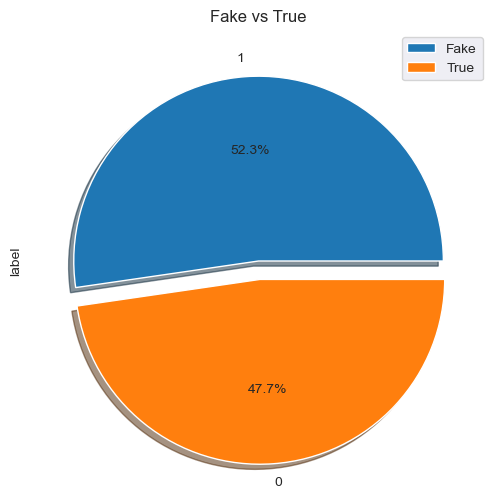

In [ ]:
# Visualisation du data :
news["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1], figsize=(6, 6), autopct = '%1.1f%%',shadow = True)
plt.title("Fake vs True")
plt.legend(["Fake", "True"])
plt.show()

label
0    21417
1    23481
Name: original, dtype: int64


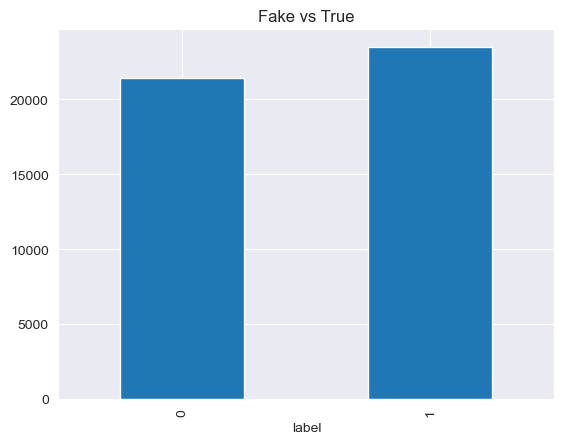

In [ ]:
# Nombre de fake et true news :
print(news.groupby(['label'])['original'].count())
news.groupby(['label'])['original'].count().plot(kind="bar")
plt.title("Fake vs True")
plt.show()

Text(0, 0.5, 'fréquence')

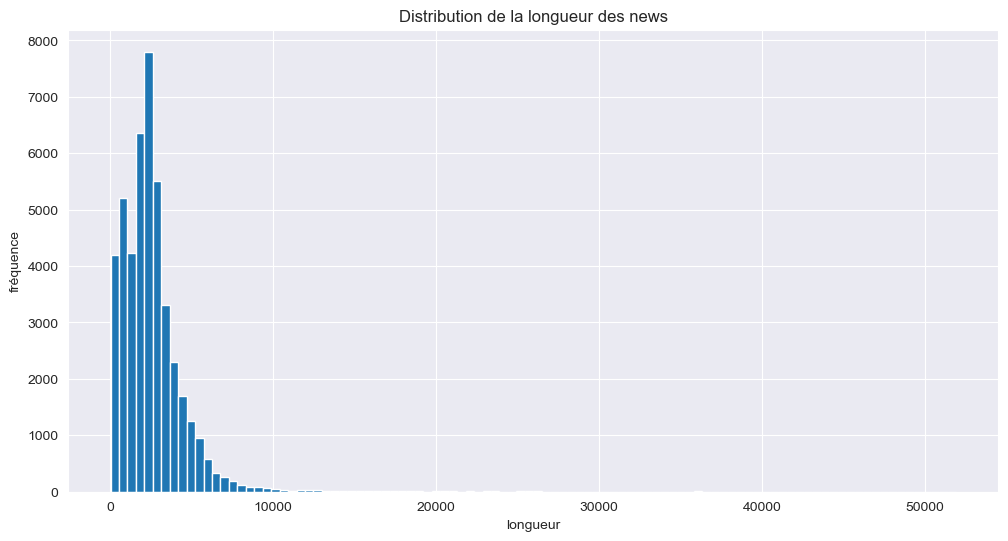

In [ ]:
# Distribution :
plt.figure(figsize=(12, 6))
news['length'].plot(bins=100, kind = 'hist')
plt.title('Distribution de la longueur des news')
plt.xlabel("longueur")
plt.ylabel("fréquence")

Text(0.5, 0, 'News Length')

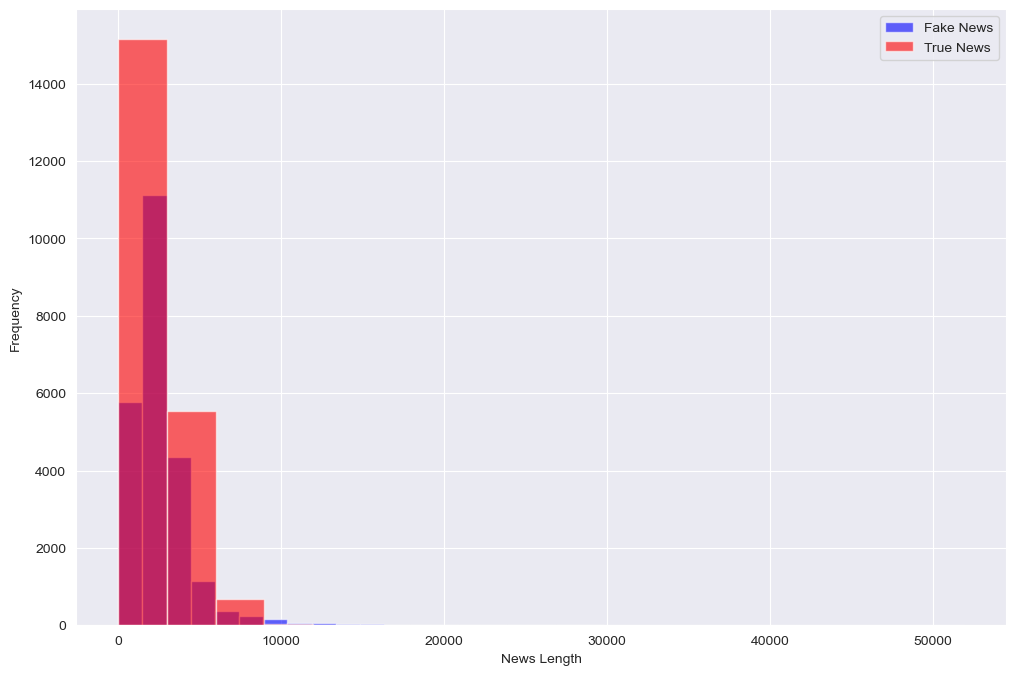

In [ ]:
# Représentation de la longeur des news par label :
plt.figure(figsize=(12, 8))

news[news.label == 1].length.plot(bins=35, kind='hist', color='blue',
                                        label='Fake News', alpha=0.6)
news[news.label == 0].length.plot(kind='hist', color='red',
                                        label='True News', alpha=0.6)
plt.legend()
plt.xlabel("News Length")

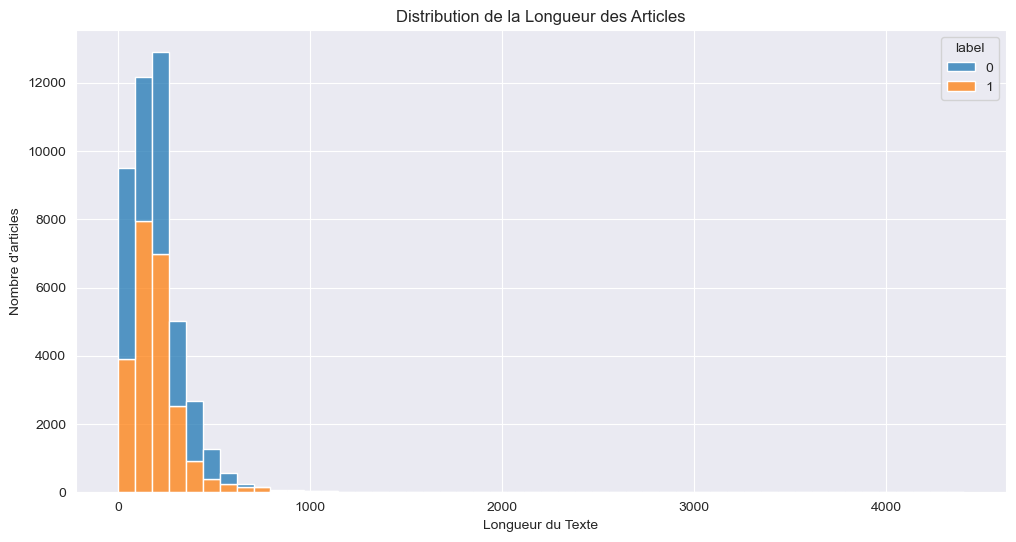

In [ ]:
# Calculer la longueur des articles :
news['text_length'] = news['original'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=news, x='text_length', hue='label', multiple='stack', bins=50)
plt.title('Distribution de la Longueur des Articles')
plt.xlabel('Longueur du Texte')
plt.ylabel('Nombre d\'articles')
plt.show()

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: original, dtype: int64


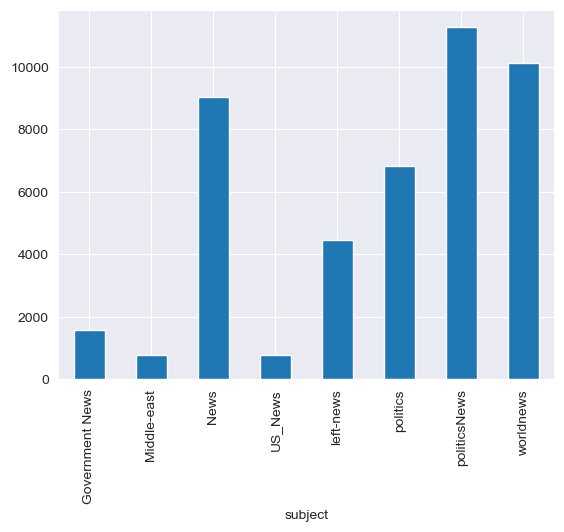

In [ ]:
# Nombre d'articles par subject :
print(news.groupby(['subject'])['original'].count())
news.groupby(['subject'])['original'].count().plot(kind="bar")
plt.show()

In [ ]:
# Fonction permettant de visualiser les mots les plus fréquents :

from nltk.tokenize import WhitespaceTokenizer
from nltk import tokenize

token_space = WhitespaceTokenizer()

def counter(original, column_text, quantity):
    all_words = []
    for text in original[column_text].fillna(""):
        text = ' '.join(text)  # concaténer les éléments de la liste en une chaîne de caractères
        token_phrase = token_space.tokenize(text)
        all_words.extend(token_phrase)
    frequency = nltk.FreqDist(all_words)
    news_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    news_frequency = news_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = news_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

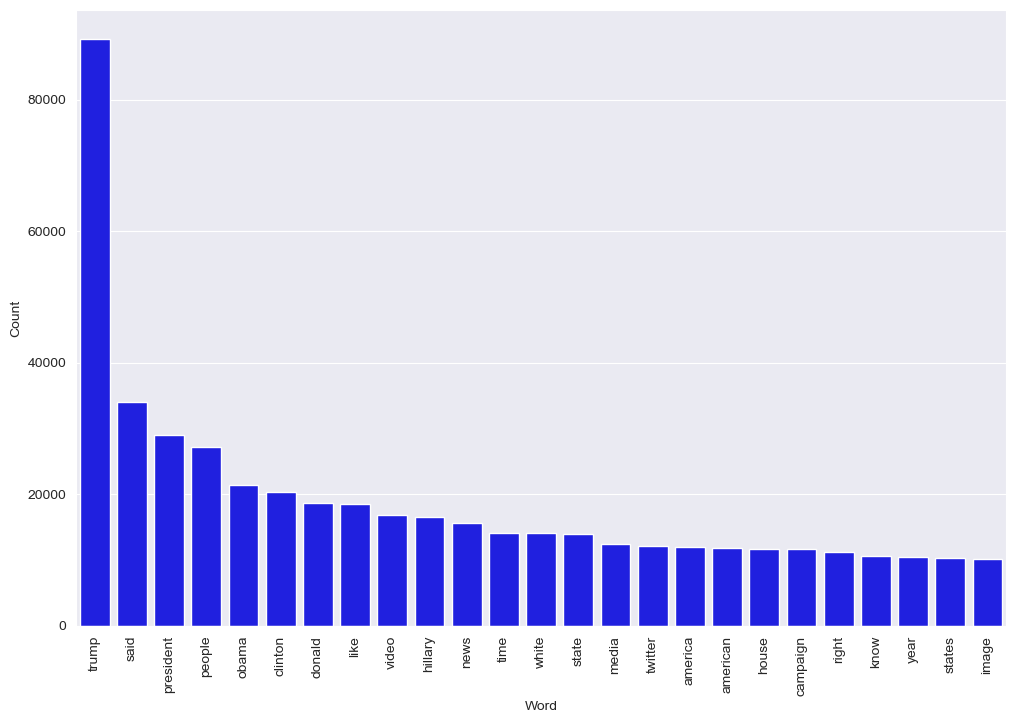

In [ ]:
# Les plus fréquents mots de fake news :

counter(news[news["label"] == 1], "original", 25)

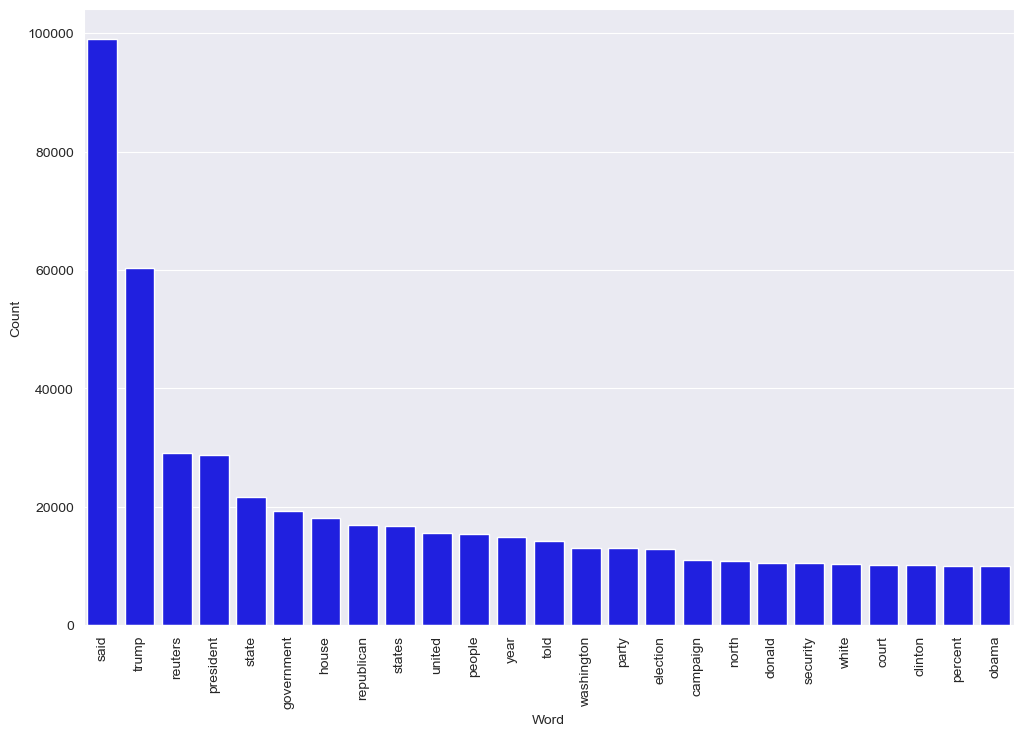

In [ ]:
# Les plus fréquents mots de true news :

counter(news[news["label"] == 0], "original", 25)

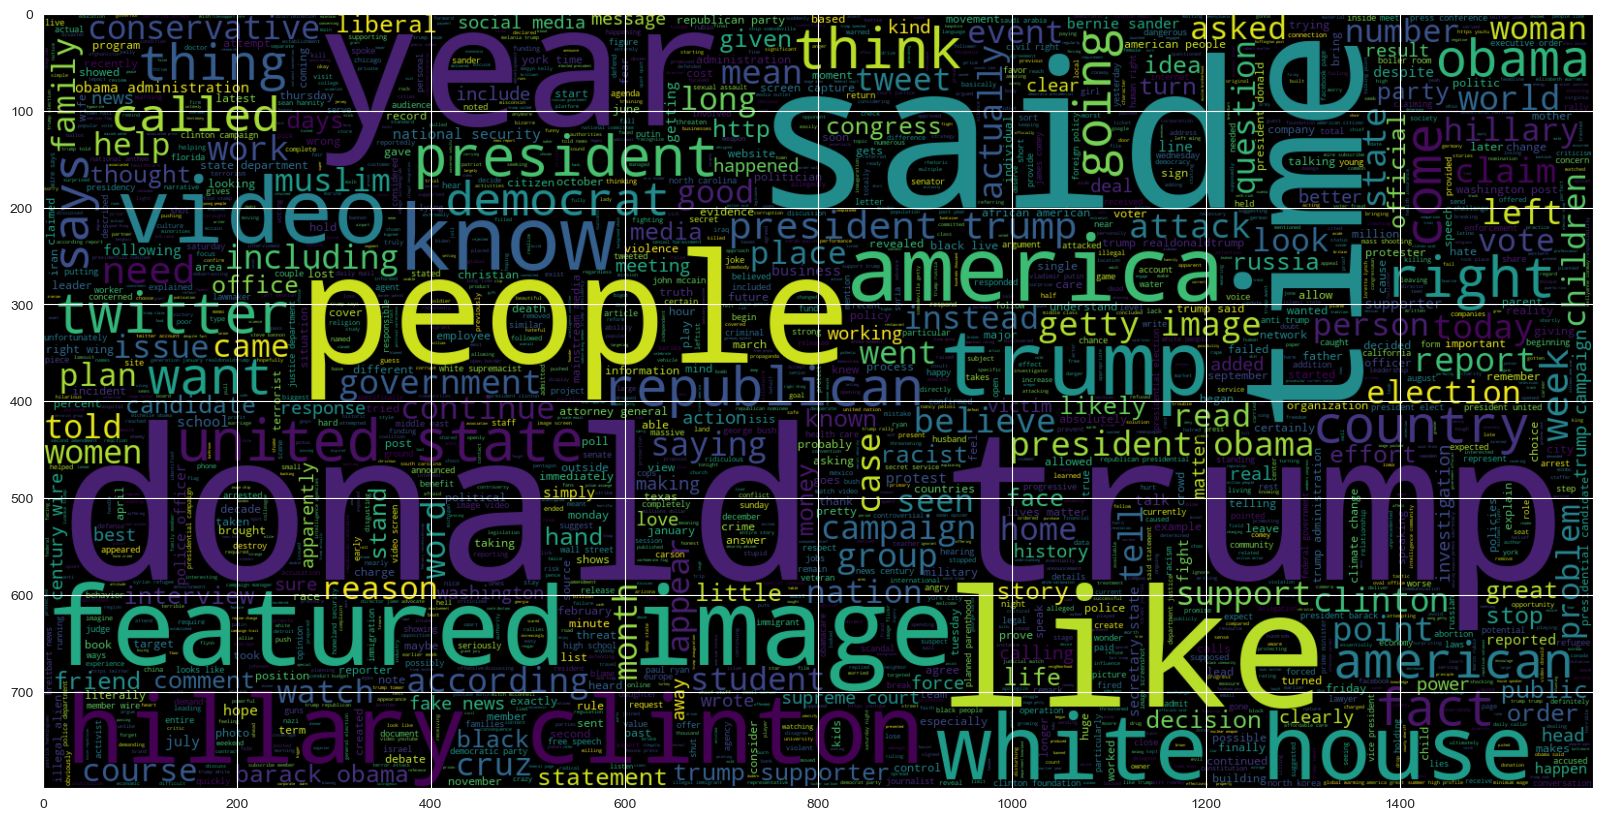

In [ ]:
# Tracer le nuage de mots pour fake news :

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(news[news.label == 1].original_joined))
plt.imshow(wc, interpolation = 'bilinear')

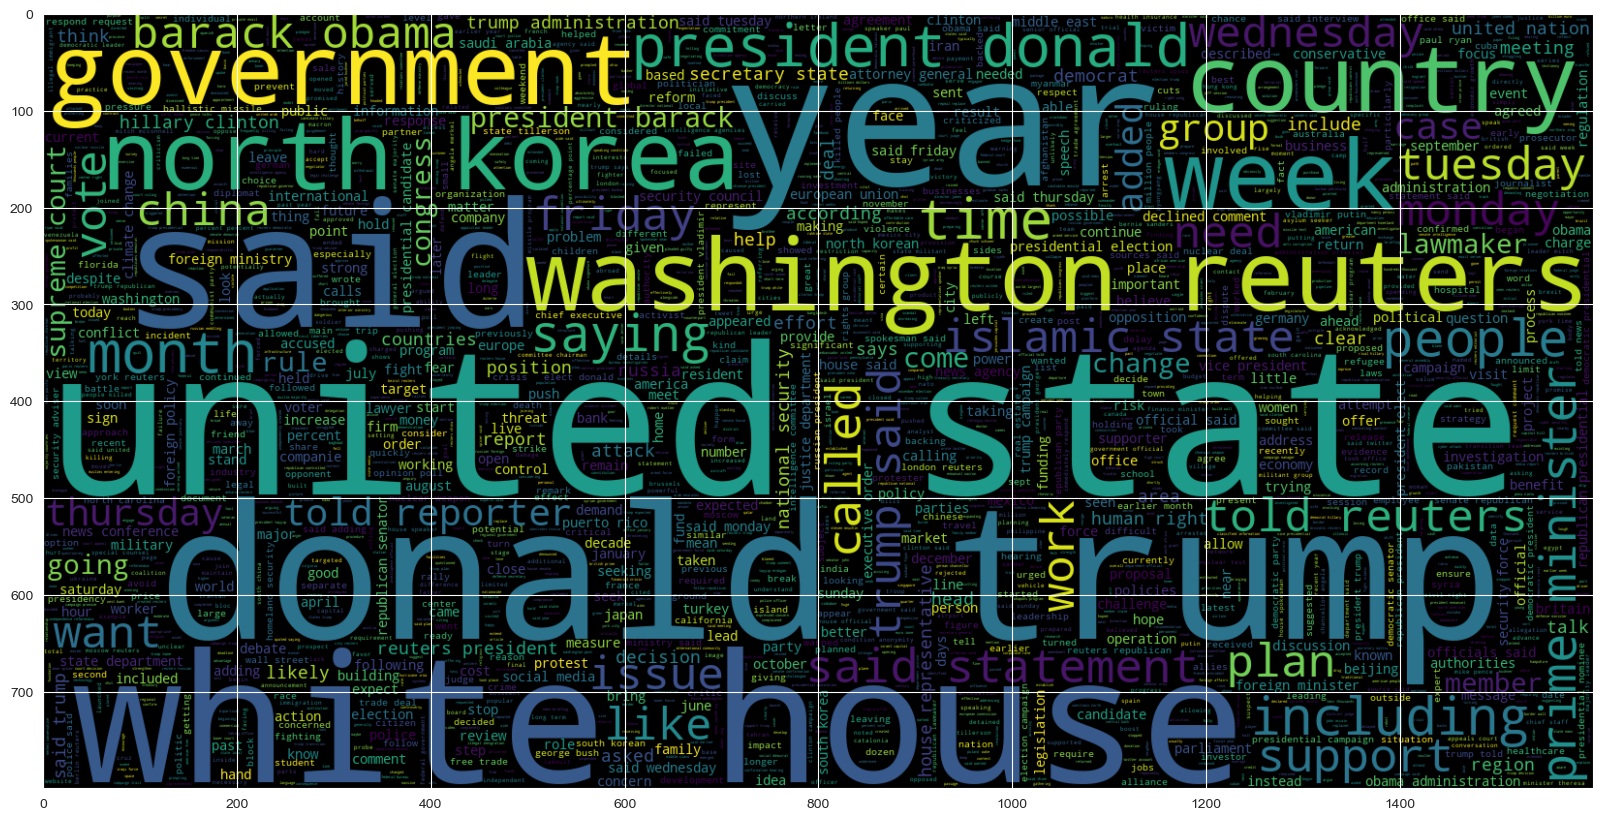

In [ ]:
# Tracer le nuage de mots pour real news :

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(news[news.label == 0].original_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
# La longueur du document maximum nécessaire à la création de word embeddings :

nltk.download('punkt')

maxlen = -1
for doc in news.original_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
maxlen

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tatevikpiroyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4405

## 4. Modèles de Machine Learning

### I/ Importation + Nettoyage :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle

import gensim

In [ ]:
# Télécharger stopwords :
nltk.download("stopwords")
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tatevik.piroyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Chargement des datasets :
fake = pd.read_csv("C:/Users/tatevik.piroyan/OneDrive - HOLY-DIS/Documents/FakeNews/Fake.csv")
true = pd.read_csv("C:/Users/tatevik.piroyan/OneDrive - HOLY-DIS/Documents/FakeNews/True.csv")

In [ ]:
# Ajout d'une colonne 'label' :
fake['label'] = 1
true['label'] = 0

In [ ]:
# Concaténation des datasets :
news = pd.concat([fake, true]).reset_index(drop=True)

In [ ]:
# Combinaison des colonnes 'title' et 'text' :
news['original'] = news['title'] + ' ' + news['text']

# Suppression des colonnes inutiles :
news.drop(columns=['date', 'title', 'text'], inplace=True)

In [ ]:
# Mélange des données :
news = shuffle(news).reset_index(drop=True)
news

subject  label                                           original
0      politicsNews      0  Trump campaign signals possible shift on immig...
1         worldnews      0  Still battling for independence, Lebanon to ma...
2         worldnews      0  Coalition says fewer than 3,000 IS fighters re...
3              News      1   NYC Cop Under Investigation After Being Buste...
4          politics      1  GOODBYE HILLARY? Here Comes Dumb And Dumber Ca...
...             ...    ...                                                ...
44893  politicsNews      0  New York Pride marchers target Trump as San Fr...
44894          News      1   FBI Agents Are Doing Something Unusual In The...
44895  politicsNews      0  California governor signs 'sanctuary state' bi...
44896  politicsNews      0  Trump blames fellow Republican leaders for deb...
44897  politicsNews      0  Canada says most border-crossing asylum seeker...

[44898 rows x 3 columns]

In [ ]:
# Prétraitement du texte :
def preprocess(original):
    result = []
    for token in gensim.utils.simple_preprocess(original):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
    return result

news['original'] = news['original'].apply(preprocess)
news['original_joined'] = news['original'].apply(lambda x: " ".join(x))

In [ ]:
# Transformation des textes en vecteurs TF-IDF :
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(news['original_joined']).toarray()
y = news['label']

### II/ Modèles de Classification Traditionnels :

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Division des données en ensembles d'entraînement et de test :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fonction pour évaluer les modèles :
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

##### Régression Logistique :

In [ ]:
# Régression Logistique :
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print("\nLogistic Regression Performance")
evaluate_model(log_reg, X_test, y_test)


Logistic Regression Performance
Accuracy: 0.9844097995545658
Precision: 0.9877970456005138
Recall: 0.9823291462635725
F1 Score: 0.9850555081127241
Confusion Matrix:
 [[4226   57]
 [  83 4614]]


##### Arbre de Décision :

In [ ]:
# Arbre de Décision :
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Performance")
evaluate_model(dt, X_test, y_test)

Decision Tree Performance
Accuracy: 0.9959910913140312
Precision: 0.9944833439422873
Recall: 0.9978709814775388
F1 Score: 0.9961742826780021
Confusion Matrix:
 [[4257   26]
 [  10 4687]]


##### Forêt Aléatoire :

In [ ]:
# Forêt Aléatoire :
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("\nRandom Forest Performance")
evaluate_model(rf, X_test, y_test)


Random Forest Performance
Accuracy: 0.9985523385300669
Precision: 0.9987223168654173
Recall: 0.9985096870342772
F1 Score: 0.9986159906313212
Confusion Matrix:
 [[4277    6]
 [   7 4690]]


##### SVM :

In [ ]:
# SVM :
svm = SVC()
svm.fit(X_train, y_train)
print("\nSVM Performance")
evaluate_model(svm, X_test, y_test)


SVM Performance
Accuracy: 0.9914253897550112
Precision: 0.9927474402730375
Recall: 0.990845220353417
F1 Score: 0.9917954182205647
Confusion Matrix:
 [[4249   34]
 [  43 4654]]


#### Visulaisations :

##### Matrice de Confusion :

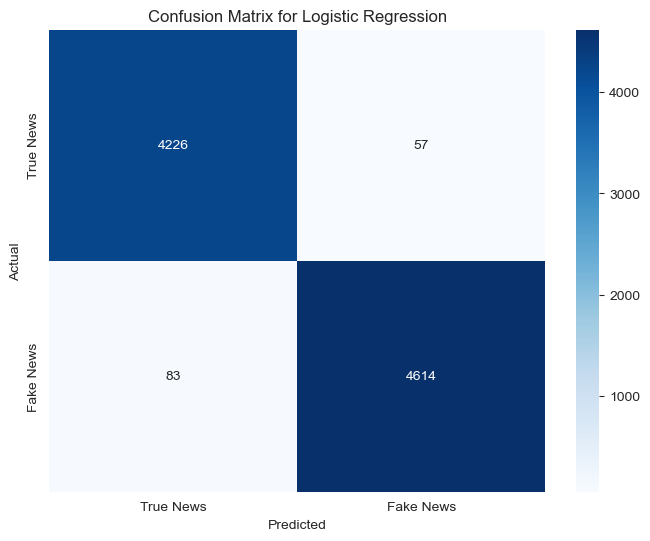

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prédiction des étiquettes
y_pred = log_reg.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True News', 'Fake News'], yticklabels=['True News', 'Fake News'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix for Logistic Regression')

##### Courbe ROC et AUC :

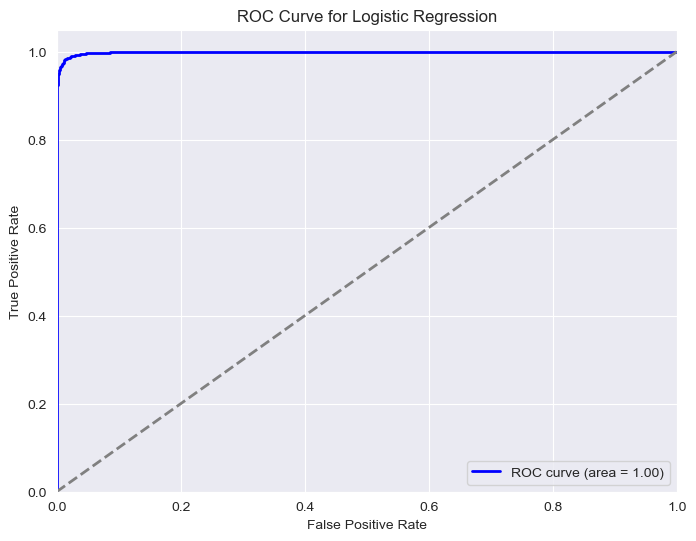

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Entraînement de la régression logistique :
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Prédiction des probabilités :
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_pred_proba, 'ROC Curve for Logistic Regression')

##### Courbe de Précision-Rappel :

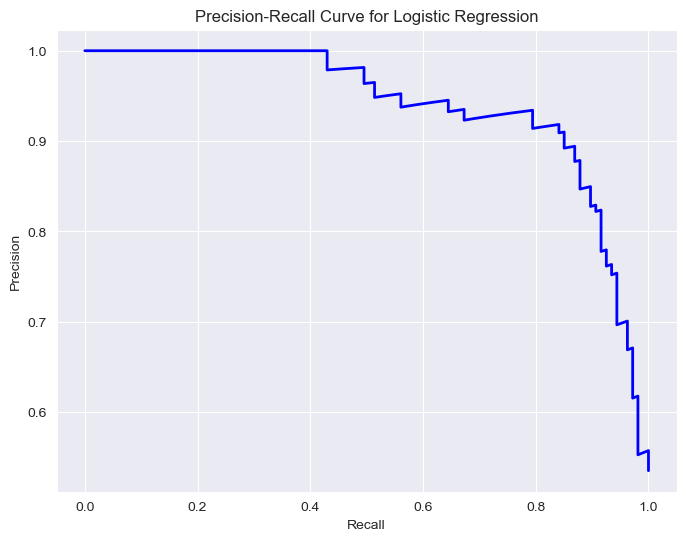

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_pred_proba, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()

plot_precision_recall_curve(y_test, y_pred_proba, 'Precision-Recall Curve for Logistic Regression')

### III/ Modèles de Deep Learning :

##### LSTM :

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

In [32]:
# Tokenization et Padding :
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(news['original_joined'])
X_seq = tokenizer.texts_to_sequences(news['original_joined'])
X_pad = pad_sequences(X_seq, maxlen=200)

In [33]:
y = news['label']

In [34]:
# Division des données en ensembles d'entraînement et de test :
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [35]:
# Fonction pour construire le modèle LSTM :
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [36]:
# Entraînement du modèle LSTM :
lstm_model = create_lstm_model()
lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
562/562 [==============================] - 1375s 2s/step - loss: 0.1192 - accuracy: 0.9562 - val_loss: 0.0687 - val_accuracy: 0.9778
Epoch 2/5
562/562 [==============================] - 1365s 2s/step - loss: 0.0780 - accuracy: 0.9707 - val_loss: 0.0435 - val_accuracy: 0.9833
Epoch 3/5
562/562 [==============================] - 1345s 2s/step - loss: 0.0397 - accuracy: 0.9857 - val_loss: 0.0393 - val_accuracy: 0.9876
Epoch 4/5
562/562 [==============================] - 1397s 2s/step - loss: 0.0481 - accuracy: 0.9839 - val_loss: 0.0999 - val_accuracy: 0.9700
Epoch 5/5
562/562 [==============================] - 1286s 2s/step - loss: 0.0380 - accuracy: 0.9874 - val_loss: 0.0451 - val_accuracy: 0.9851


In [ ]:
# Évaluation du modèle LSTM :
y_pred = (lstm_model.predict(X_test) > 0.5).astype("int32")
print("\nLSTM Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

281/281 [==============================] - 28s 96ms/step

LSTM Performance
Accuracy: 0.97728285077951
Precision: 0.9878022217381834
Recall: 0.9683963271407218
F1 Score: 0.9780030191934441
Confusion Matrix:
 [[4241   56]
 [ 148 4535]]


### IV/ Modèle Pré-entraîné de Langage :

##### BERT :

In [29]:
fake = pd.read_csv("C:/Users/tatevik.piroyan/OneDrive - HOLY-DIS/Documents/FakeNews/Fake.csv")
fake.head()

In [ ]:
true = pd.read_csv("C:/Users/tatevik.piroyan/OneDrive - HOLY-DIS/Documents/FakeNews/True.csv")
true.head()

In [ ]:
# Ajoutons une nouvelle colonne "label" pour indiquer si la nouvelle est fake ou true :
fake['label'] = 1
true['label'] = 0

In [ ]:
# Concaténer les true et les fake news :
news = pd.concat([fake, true]).reset_index(drop = True)
news

In [35]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Télécharger les stopwords :
nltk.download('stopwords')
nltk.download('punkt')

# Fonction de nettoyage du texte :
def clean_text(text):
    text = text.lower()  # Convertir en minuscule
    text = re.sub(r'<.*?>', '', text)  # Supprimer les balises HTML
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Supprimer les URL
    text = re.sub(r'\@w+|\#','', text)  # Supprimer les mentions et hashtags
    stop_words = set(stopwords.words('english'))  # Obtenir les stopwords en anglais
    word_tokens = word_tokenize(text)  # Tokeniser le texte
    filtered_text = [word for word in word_tokens if word not in stop_words]  # Supprimer les stopwords
    text = ' '.join(filtered_text)  # Rejoindre les mots en une seule chaîne
    return text

# Appliquer la fonction de nettoyage :
news['clean_text'] = news['text'].apply(clean_text)

# Afficher les premières lignes du dataframe nettoyé :
print(news[['text', 'clean_text', 'label']].head())

"\nimport re\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\n\n# Télécharger les stopwords :\nnltk.download('stopwords')\nnltk.download('punkt')\n\n# Fonction de nettoyage du texte :\ndef clean_text(text):\n    text = text.lower()  # Convertir en minuscule\n    text = re.sub(r'<.*?>', '', text)  # Supprimer les balises HTML\n    text = re.sub(r'http\\S+|www\\S+|https\\S+', '', text, flags=re.MULTILINE)  # Supprimer les URL\n    text = re.sub(r'\\@w+|\\#','', text)  # Supprimer les mentions et hashtags\n    stop_words = set(stopwords.words('english'))  # Obtenir les stopwords en anglais\n    word_tokens = word_tokenize(text)  # Tokeniser le texte\n    filtered_text = [word for word in word_tokens if word not in stop_words]  # Supprimer les stopwords\n    text = ' '.join(filtered_text)  # Rejoindre les mots en une seule chaîne\n    return text\n\n# Appliquer la fonction de nettoyage :\nnews['clean_text'] = news['text'].apply(clean_text)\n\n# Affi

In [34]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch

# Diviser les données en ensembles d'entraînement et de test :
train_texts, test_texts, train_labels, test_labels = train_test_split(
    news['clean_text'],
    news['label'],
    test_size=0.2,
    random_state=42
)

"\nfrom sklearn.model_selection import train_test_split\nfrom transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments\nimport torch\n\n# Diviser les données en ensembles d'entraînement et de test :\ntrain_texts, test_texts, train_labels, test_labels = train_test_split(\n    news['clean_text'], \n    news['label'], \n    test_size=0.2, \n    random_state=42\n)\n"

In [ ]:
# Initialiser le tokenizer BERT :
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer

In [ ]:
# Tokenizer les textes :
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=512)

In [ ]:
train_encodings

In [ ]:
test_encodings

In [ ]:
# Créer une classe de dataset :
class FakeNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = FakeNewsDataset(train_encodings, train_labels.tolist())
test_dataset = FakeNewsDataset(test_encodings, test_labels.tolist())

In [ ]:
# Initialiser le modèle BERT :
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

In [ ]:
# Définir les arguments d'entraînement :
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

In [ ]:
# Initialiser le Trainer :
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [ ]:
# Entraîner le modèle :
trainer.train()

#### D/ Optimisation et Évaluation du Modèle :

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Définir une fonction de calcul des métriques :
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='binary')
    acc = accuracy_score(labels, pred)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
# Réentraîner le modèle avec une fonction de calcul des métriques :
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

In [ ]:
# Évaluer le modèle :
eval_result = trainer.evaluate()

# Afficher les résultats :
print(f"Accuracy: {eval_result['eval_accuracy']}")
print(f"F1 Score: {eval_result['eval_f1']}")
print(f"Precision: {eval_result['eval_precision']}")
print(f"Recall: {eval_result['eval_recall']}")